In [49]:
# Init. This code snippet should be hidden in final output.
img_folder = '30_Correlation'
img_path = './' + img_folder + '/'

# setup vector for latex
from matplotlib.pyplot import *
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [ ]:
%load_ext tikzmagic

# Visualization

Now that we have seen TIA is already doing a good job on giving us a measure of the linearity, we shall come to the core of this section. We have not yet visualized the totality of the rectangles. We could have done this earlier, but I wanted to instill a strong sense of what rectangles are we dealing with and why they are whole representative of the dataset though we have taken only half of all possible rectangles. We initially decided how do we color the rectangles, based on positive or negative relationship as a convention, and then looked in detail, what are the rectangles to be plotted. Let us consider the sample sets as below. Recall these were the same sample sets we saw in the beginning of this section. Note the TIA is already calculated indicating us the kind of relationship. 

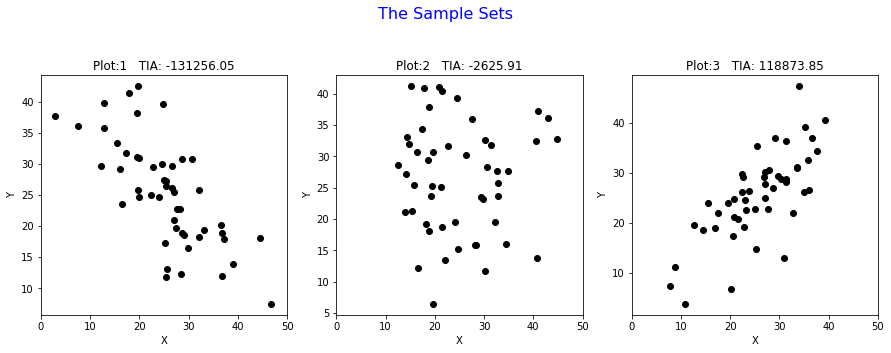

In [51]:
# easy generation of correlated random data
# https://stackoverflow.com/questions/16016959/scipy-stats-seed
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter

def get_TIA(X,Y):
    N = len(X)
    comb_l, area = sorted(zip(X,Y), key=lambda x: x[1]), 0  #sorting w.r.t Y
    for i in range(0,N):  # equivalent for i = 1 to N because, range is 0 to N-1
        for j in range(i+1,N):        
            X1, Y1, X2, Y2 = comb_l[i][0], comb_l[i][1], comb_l[j][0], comb_l[j][1]    
            d1, d2 = X2 - X1, Y2 - Y1  
            area += d1*d2   
    return round(area,2)

np.random.seed(seed=0)

def give_cov(corr, X, Y, n):
    means = [X.mean(), Y.mean()]  
    stds = [X.std() / 3, Y.std() / 3]
    covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 
    m = np.random.multivariate_normal(means, covs, n).T
    return m[0], m[1]
    
N = 50    
X = np.array([0, N])
Y = np.array([0, N])


corr_l = [-0.7, 0, 0.7]
fig, axarr = plt.subplots(1,3,figsize=(15,5))

for i in range(0, len(corr_l)):
    Xs , Ys = give_cov(corr_l[i], X, Y, N)
    ax = axarr[i]
    ax.scatter(Xs, Ys, color='black')
    tia = get_TIA(Xs,Ys)
    ax.title.set_text('Plot:{}   TIA: {}'.format(i+1, tia))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim([0,N])
    
plt.suptitle('The Sample Sets', color='blue', fontsize=16)
plt.subplots_adjust(top=0.79)
plt.show();


As per TIA from Figure $\ref{fig:C3_002}$, Plot 1 is highly negatively correlated, Plot 2 is somewhat negative, and Plot 3 is positively correlated. Though visually Plots 1 and 3 look like not having much difference in their _slope_ or _rate_, our TIA gives a wide difference in value. This is because, TIA between sample sets are not comparable (we will solve that soon in correlation, but remember this problem). That is, given a sample set, say Plot 1, having -148859 is one of infinite no of possibilities among that sample set, with perfectly linear positive, negative and 0 TIA as one of those. Simiarly for sample set in Plot 2 and so on. Below are the sample sample plots with colored rectangles laid over them. Remember, if N is the size of sample set, or no of $(x,y)$ pairs, then the number of rectangles we have drawn is $N(N-1)/2$. And as we already saw, only because of this limited rectangles, we get the output as below without neutralization issues. 

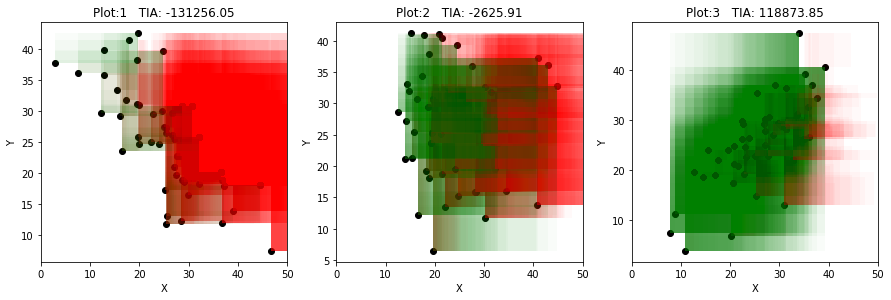

In [52]:
import matplotlib.patches as patches
from itertools import combinations

np.random.seed(seed=0)

def plot_crecs(Xm,Ym, ax):
    yi = [0,0]
    comb_l = sorted(zip(Xm,Ym), key=lambda x: x[1])  #sorting w.r.t Y
    for XY1,XY2 in combinations(comb_l,2):
        X1, Y1, X2, Y2 = XY1[0], XY1[1], XY2[0], XY2[1]
        if (X2 > X1):
            color, d1, d2 = 'green', X2 - X1, Y2 - Y1  # positive
            yi[1] += d1*d2
        elif (X2 < X1):
            color, d1, d2 = 'red', X1 - X2, Y2 - Y1  # negative
            yi[0] -= d1*d2
        ax.add_patch(patches.Rectangle((X1, Y1), d1, d2, alpha=0.025, facecolor=color))
    return yi


fig, axarr = plt.subplots(1,3,figsize=(15,5))
y = [[], [], []]
tia_l = []
for i in range(0, len(corr_l)):
    Xs , Ys = give_cov(corr_l[i], X, Y, N)    
    tia = get_TIA(Xs,Ys)
    tia_l.append(tia)
    ax = axarr[i]
    y[i] = plot_crecs(Xs,Ys, ax)
    ax.scatter(Xs, Ys, color='black')    
    ax.title.set_text('Plot:{}   TIA: {}'.format(i+1, tia))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim([0,N])
    
# plt.suptitle('The Visualization of Covariance', color='blue', fontsize=16)    
plt.subplots_adjust(top=0.79)
plt.show();

I think, Figure $\ref{fig:C3_002}$ speaks for itself :) Plot 1,which has highly negative linear relationship among its sample sets, has more red rectangles than green. Plot 2, which is very less linearity in any direction, shows an almost equal mix of red and green, of course the accurate measure is reflected in its TIA though. Plot 3, which has a positive linear relationship, obviously has lot more green. Figure $\ref{fig:C3_003}$ gives total area of red and green separately, giving us better glimpse of the _net_ relationship underneath. The TIA is just the difference between the total green area and red area. 

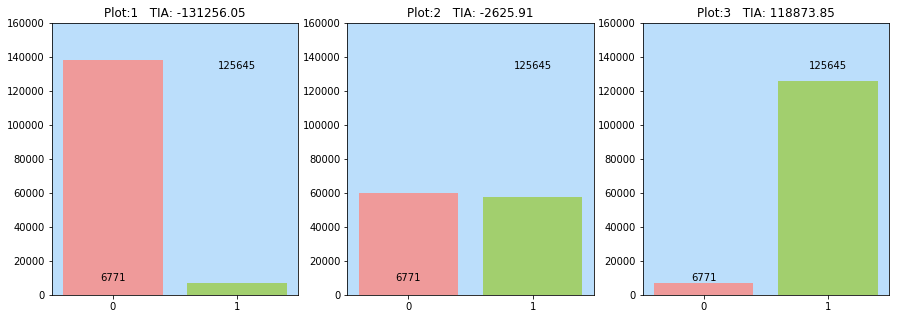

In [53]:
def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
    

fig, axr = plt.subplots(1,3, figsize=(15,5))
x, y = [0,1], y 

mean_l = []
for i in range(len(axr)):    
    ax, yi = axr[i], y[i]
    mean_l.append((yi[1]+yi[0])/(N**2))  # find mean before making it absolute
    yi = [abs(k) for k in yi]    
    patches = ax.bar(x, yi)    
#     print(mean)
    ax.set_xticks(np.arange(min(x), max(x)+1, 1.0))
#     ax.axvline(x=mean, color='#01579B', ls=':', lw=2)
    ax.set_ylim([0,160000])
    ax.set_facecolor('#BBDEFB')
    patches[0].set_facecolor('#EF9A9A')
    patches[1].set_facecolor('#a2cf6e')
    ax.title.set_text('Plot:{}   TIA: {}'.format(i+1, tia_l[i]))
    autolabel(rects, ax)
            
plt.show()

# Expected value of TIA

For any given sample set, we are typically interested not in the total of the sample set, but most probable or best representative candidate of that sample set. In our case, our sample set of TIA, is not individual pairs $(x_i,y_i)$, but a function of them, a product $(x_i-x_j)(y_i-y_j)$. That is, using $\ref{eq:C002}$ if,  
$$
h(X,Y) = \sum\limits_{i=1}^N\sum\limits_{j=i+1}^{N}(x_i - x_j)(y_i - y_j)
$$

then, we are interested in $E[h(X,Y)]$

As per expectation formula, 

\begin{equation}
E[h(X,Y)] =  \sum\limits_{i=1}^N\sum\limits_{j=i+1}^{N}(x_i - x_j)(y_i - y_j)p(x_i , y_i) \label{eq:C3_001}
\end{equation}

> Note, we are not interested in expected value of _number of rectangles_ or _red colored rectangles_ etc. The area of rectangles carry the measure and each rectangle might have different area. We are thus interested in the _expected value_ of the area, given the _total_ interested area.

_Expectation_ needs a _joint probability mass function_ $p(X,Y)$ associated with $h(X,Y)$. Recall the rectangle graph for $N=6$ and replace with area $A_{ij}$ (could also call as product, $P_{ij}$ but just to avoid notational confusion with probability let us stick with area). 

In [54]:
preamble = '''
    \pgfplotsset{compat=1.15}
'''

\ 


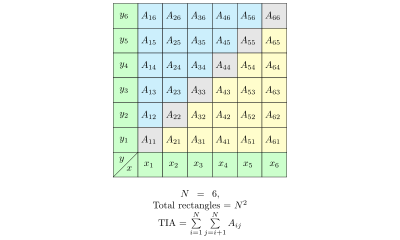

In [75]:
%%tikz -p pgfplots,pgfplotstable,xcolor -x $preamble -l matrix,positioning -f svg
\tikzset{%
square matrix/.style={
    matrix of nodes,
    column sep=-\pgflinewidth, 
    row sep=-\pgflinewidth,
    nodes in empty cells,
    nodes={draw,
      minimum size=#1,
      anchor=center,
      align=center,
      inner sep=0pt
    },
    column 1/.style={nodes={fill=green!20}},
    row 7/.style={nodes={fill=green!20}},
  },
  square matrix/.default=0.9cm
}
\newcommand{\tx}{|[fill=cyan!20]|}
\newcommand{\tb}{|[fill=yellow!20]|}
\newcommand{\tg}{|[fill=gray!20]|}

\matrix[square matrix] (A)
{
$y_6$ & \tx $A_{16}$ & \tx $A_{26}$ & \tx $A_{36}$ & \tx $A_{46}$ & \tx $A_{56}$ & \tg $A_{66}$ \\ 
$y_5$ & \tx $A_{15}$ & \tx $A_{25}$ & \tx $A_{35}$ & \tx $A_{45}$ & \tg $A_{55}$ & \tb $A_{65}$ \\
$y_4$ & \tx $A_{14}$ & \tx $A_{24}$ & \tx $A_{34}$ & \tg $A_{44}$ & \tb $A_{54}$ & \tb $A_{64}$ \\
$y_3$ & \tx $A_{13}$ & \tx $A_{23}$ & \tg $A_{33}$ & \tb $A_{43}$ & \tb $A_{53}$ & \tb $A_{63}$   \\ 
$y_2$ & \tx $A_{12}$ & \tg $A_{22}$ & \tb $A_{32}$ & \tb $A_{42}$ & \tb $A_{52}$ & \tb $A_{62}$ \\ 
$y_1$ & \tg $A_{11}$ & \tb $A_{21}$ & \tb $A_{31}$ & \tb $A_{41}$ & \tb $A_{51}$ & \tb $A_{61}$ \\ 
  & $x_1$ & $x_2$ & $x_3$ & $x_4$ & $x_5$ & $x_6$\\ 
};

\draw (A-7-1.north east)--(A-7-1.south west);
\node[below left=4mm and 1mm of A-7-1.north east] {$x$};
\node[above right=4mm and 1mm of A-7-1.south west] {$y$};


        \node[below=0.50cm,align=center,text width=4cm] at (0,-3)
        {
            $N=6$, \\ Total rectangles = $N^2$ \\ TIA = $\sum\limits_{i=1}^N\sum\limits_{j=i+1}^NA_{ij}$
        };

Assuming each _area_ has equal probability, given the number of area, each $A_{ij}$ will have a probability of $\dfrac{1}{N^2}$ as there are $N^2$ area components possible. Thus, $\ref{eq:C3_001}$ becomes, 

\begin{equation}
E[h(X,Y)] =  \sum\limits_{i=1}^N\sum\limits_{j=i+1}^{N}(x_i - x_j)(y_i - y_j)p(x_i , y_i) =  \dfrac{1}{N^2}\sum\limits_{i=1}^N\sum\limits_{j=i+1}^{N}(x_i - x_j)(y_i - y_j) \label{eq:C3_002}
\end{equation}

Ladies and Gentlemen. That $E[h(X,Y)]$ is called **Covariance** of X and Y , shortly called $\mathbf{\mathrm{Cov}(X,Y)}$. Also note, the alternative form we saw earlier in equation $\ref{eq:C003}$, could also be used to derive covariance as below. 

\begin{equation}
E[h(X,Y)] =  \sum\limits_{i=1}^N\sum\limits_{j=i+1}^{N}(x_i - x_j)(y_i - y_j)p(x_i , y_i) =  \dfrac{1}{2N^2}\sum\limits_{i=1}^N\sum\limits_{j=1}^{N}(x_i - x_j)(y_i - y_j) \label{eq:C3_003}
\end{equation}

# Standard Formula

What we have seen so far, is a deformed form of covariance which numerically gave us the same results as a  standard formula. It is mathematically possible to show that,

\begin{equation}
\mathrm{Cov}(X,Y) = \sum\limits_{i=1}^N\sum\limits_{j=i+1}^{N}(x_i - x_j)(y_i - y_j)p(x_i , y_i) = \sum\limits_{i=1}^{N}(x_i - \overline{x})(y_i - \overline{y}) p(x_i , y_i) \label{eq:C3_004}
\end{equation}

At the time of this writing, the [doubts](https://math.stackexchange.com/questions/2982674/single-to-double-summation-via-vector-matrix-problem) in the derivation is not yet cleared, if and once it is done, this section should be enriched with a proper derivation. Till then, this is a discontinuity in our understanding. The visualization of standard formula is slightly different because it involves mean, so all rectangles have one corner at mean position $(\overline{x},\overline{y})$. The visualization is shown in figure $\ref{fig:C3_005}$. The top 3 rows from our deformed formula and bottom 3 using standard formula. One could observe, the rectangles in plots 3,4,and 5 are centered around the mean (shown in dotted lines), thus giving a better viusal perception of the measure (no of red or green rectangles, which is more). We did not start with this visualization only because, there was no intuition to introduce mean in the equation out of no where. 

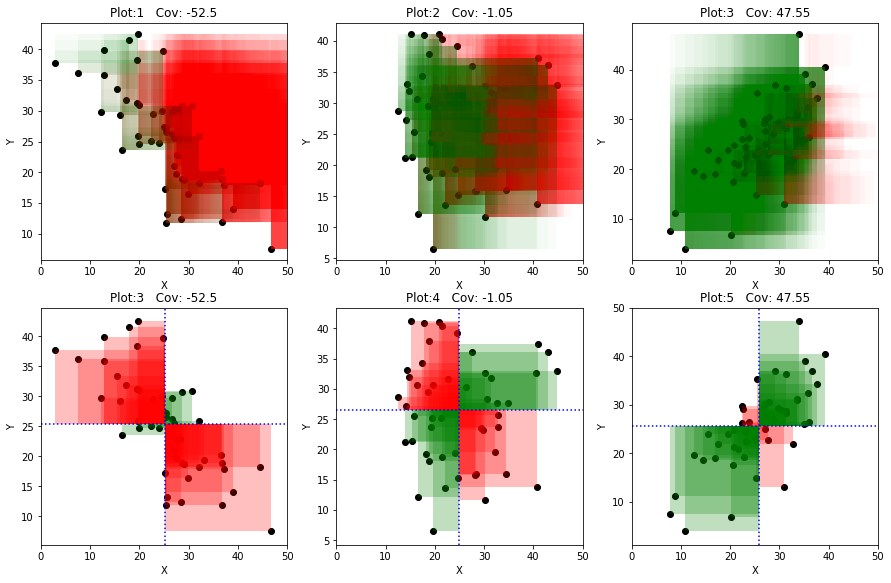

In [74]:
import matplotlib.patches as patches
from itertools import combinations

np.random.seed(seed=0)

def plot_crecs_std(Xm,Ym, ax):
    yi, area = [0,0], 0
    comb_l = sorted(zip(Xm,Ym), key=lambda x: x[1])  #sorting w.r.t Y
    Xb, Yb = sum(Xm)/len(Xm), sum(Ym)/len(Ym)
    for XY in comb_l:
        X, Y = XY[0], XY[1]        
        d1, d2 = X - Xb, Y - Yb  
        pro = d1*d2
        if (pro > 0):
            color = 'green'
        else:
            color = 'red'
        area += pro
        ax.add_patch(patches.Rectangle((X, Y), -d1, -d2, alpha=0.25, facecolor=color))
    ax.axvline(x=Xb, ls=':', color='blue')
    ax.axhline(y=Yb, ls=':', color='blue')
    return round(area,2)

fig, axarr = plt.subplots(2,3,figsize=(15,10))
a1, a2 = [[], [], []], []
tia_l = []
for i in range(0, len(corr_l)):
    
    Xs , Ys = give_cov(corr_l[i], X, Y, N)    
    tia = get_TIA(Xs,Ys)
    tia_l.append(tia)
    
    ax = axarr[0,i]
    a1[i] = plot_crecs(Xs,Ys, ax)
    ax.scatter(Xs, Ys, color='black')    
    ax.title.set_text('Plot:{}   Cov: {}'.format(i+1, round(tia/N**2,2)   ))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim([0,N])
    
    ax = axarr[1,i]
    a2.append(plot_crecs_std(Xs,Ys, ax))
    ax.scatter(Xs, Ys, color='black')    
    ax.title.set_text('Plot:{}   Cov: {}'.format(i+3, round(a2[i]/N,2)) )
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim([0,N])
    
    
plt.subplots_adjust(top=0.85)
plt.show();